<a href="https://colab.research.google.com/github/jafetsierra/Data-science/blob/main/barplot_error_color_interval.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [139]:
# Use the following data for this assignment:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(12345)

df = pd.DataFrame([np.random.normal(32000,200000,3650), 
                   np.random.normal(43000,100000,3650), 
                   np.random.normal(43500,140000,3650), 
                   np.random.normal(48000,70000,3650)], 
                  index=[1992,1993,1994,1995]) 
df = df.transpose()
x = range(len(df.columns))
mean = df.mean()
error = 1.96*(df.std()/np.sqrt(df.count()))
y_value=int(input("please enter y value of interest "))

please enter y value of interest 29000


In [140]:
data_sta = mean.to_frame(name='mean')
data_sta['upper'] = data_sta['mean']+error
data_sta['lower'] = data_sta['mean']-error
data_sta['below'] = data_sta['upper'].apply(lambda x: 1 if x<y_value else 0) 
data_sta['above'] = data_sta['lower'].apply(lambda x: 1 if x>y_value else 0)  
data_sta['between'] = [1 if x==0 and y==0 else 0 for x,y in zip(data_sta['above'],data_sta['below'])]
data_sta = data_sta[['below','above','between']]

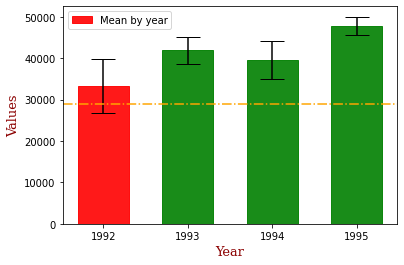

<Figure size 432x288 with 0 Axes>

In [169]:
fig, ax = plt.subplots()
plt.axhline(y=y_value, color='orange',linestyle='-.')
bars = plt.bar(x,mean,width=0.6,yerr=error,color='cyan',capsize=12,label='Mean by year',bottom=0,alpha=0.9)
i = 0
for ele in data_sta.itertuples():
  if ele[1] ==1:
    bars[i].set_color('grey')
  elif ele[2] ==1:
    bars[i].set_color('green')
  else:
    bars[i].set_color('red')
  i+=1


font = {'family': 'serif',
      'color':  'darkred',
      'weight': 'normal',
      'size': 13,
      }


plt.xticks(x,df.columns)
plt.ylabel('Values', fontdict=font)
plt.xlabel('Year', fontdict=font)
ax.legend()
plt.show()
plt.savefig('img.png')